# 17 - Quadratic Form
- 17.1 Algebraic perspective
- 17.2 Geometric perspective
- 17.3 Normalized quadratic form
- 17.4 Eigenvectors and quadratic form surfaces
- 17.5 Definiteness, geometry, and eigenvalues
- 17.6 Definiteness of $A^TA$
- 17.7 $\lambda$ and matrix definiteness
- 17.8 Code challenges
- 17.9 Code solutions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## 17.1 Algebraic perspective
Quadratic form of a square matrix $A$ and vector $v$ collapses the vector-matrix-vector product to a scalar.

$$
f(A,v) = v^T A v = \zeta
$$

Notes
- Quadratic form defined only when matrix is square.
- Quadratic form of the identity matrix equals the dot product e.g. $v^T I v = v^T v$
- Quadratic form is different when vectors are different $f(A, v) \neq f(A, w), v \neq w$
- Quadratic form of zero vector is zero e.g. $f(A, 0) = 0$

### Matrix Properties
Elements along the diagonal of the matrix multiply the squared (_quadratic_) elements of the vector.

$$
\begin{bmatrix} x_1 & x_2 \end{bmatrix}
\begin{bmatrix} a & b \\ c & d \end{bmatrix}
\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} =
a x_1^2 + (c + d) x_1 x_2 + d x_2^2
$$

Notes
- Relationship between diagonal elements of matrix and squared elements of vector holds for any size of square matrix. 

## 17.2 Geometric perspective
Quadratic form $f(A, v)$ can be mapped to 3d surface when $v \in \mathbb{R}^2$.

## 17.3 Normalized quadratic form
Magnitude of the vector makes it hard to compare the quadratic form of the same matrix with different vectors.

Normalized quadratic form reduces the dependence on the magnitude of the vector.

$$
f_{\text{norm}}(A, v) = \frac{v^T A v}{v^T v}
$$

Notes
- Normalized quadratic form is an example of mapping over magnitude from (_13.1_).
- Normalized quadratic form is not defined for the zero vector $v = 0$.
- Surface plot of normalized quadratic form will be much different from quadratic form even when the matrix is the same.

In [2]:
def quadratic_form(A, v):
    """
    quadratic_form returns the quadratic form f(A,v) = v^T A v

    :param A: numpy.ndarray  Matrix A
    :param v: numpy.ndarray  Vector v
    :return: float           Scalar quadratic form
    """
    return v.T @ A @ v


def norm_quadratic_form(A, v):
    """
    norm_quadratic_form returns the normalized quadratic form f(A,v) = v^T A v / v^T v

    :param A: numpy.ndarray  Matrix A
    :param v: numpy.ndarray  Vector v
    :return: float           Scalar normalized quadratic form
    """
    return v.T @ A @ v / (v.T @ v)

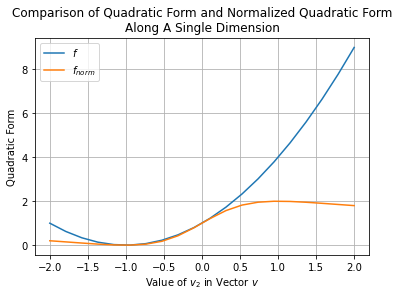

In [3]:
# Compare the quadratic form and normalized quadratic form 
# for the matrix A, by varying a single component of the
# vector v from [-2,2].
n = 2
A = np.ones((n,n))

num = 20
v1 = np.ones(num)
v2 = np.linspace(start=-2, stop=2, num=20)
v = np.stack((v1, v2), axis=1)

qfAv = np.apply_along_axis(lambda v: quadratic_form(A, v), 1, v)
qfAv_norm = np.apply_along_axis(lambda v: norm_quadratic_form(A, v), 1, v)

plt.plot(v2, qfAv, label='$f$')
plt.plot(v2, qfAv_norm, label='$f_{norm}$')
plt.title('Comparison of Quadratic Form and Normalized Quadratic Form\nAlong A Single Dimension')
plt.ylabel('Quadratic Form')
plt.xlabel('Value of $v_2$ in Vector $v$')
plt.legend()
plt.grid()
plt.show()

## 17.4 Eigenvectors and quadratic form surfaces
Direction of eigenvectors is correlated with ridges and valleys in $f_{\text{norm}}$ surface plot.
- Eigenvectors associated with relatively large eigenvalues appear as ridges.
- Eigenvectors associated with relatively small eigenvalues appear as valleys.

## 17.5 Definiteness, geometry, and eigenvalues
A positive definite matrix has the following properties:
- Is square and invertible e.g. $A^{-1}$ exists
- Sign of $f_{\text{norm}}$ is positive for all possible values of $v$
- Sign of *all* eigenvalues is positive (_magnitude doesn't matter_)

## 17.6 Definiteness of $A^TA$
Matrices formed by $A^T A$ and $A A^T$ are always either positive definite or positive semidefinite.
- When $A^T A$ is full-column rank or $A A^T$ is full-row-rank, then the matrix is positive definite.

## 17.7 $\lambda$ and matrix definiteness

## 17.8 Code challenges

> Write code to create and visualize quadratic form surfaces of $2 \times 2$ matrices.

In [4]:
def plot_quadratic_form_surface(A, fAv, start, stop, num, title):
    """
    plot_quadratic_form_surface plots the quadratic form surface of the matrix A

    :param img1: numpy.ndarray  Image
    :param fAv: func            fAv is a function for computing quadratic form 
    :param start: float         Lower bound of the coordinate grid
    :param stop: float          Upper bound of the coordinate grid
    :param num: int             Number of points along one dimension of the grid
    :param title: str           Plot title
    """
    assert A.shape == (2,2), "A must be 2 X 2"

    # Generate a 2d mesh and evaluate the function at points within mesh.
    vv = np.linspace(start=start, stop=stop, num=num)
    v1, v2 = np.meshgrid(vv, vv, indexing='ij')
    v = np.vstack((v1.ravel(), v2.ravel()))
    z = np.apply_along_axis(fAv, 0, v).reshape(num, num)
    
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(projection='3d')
    ax.view_init(elev=20., azim=60.)
    surf = ax.plot_surface(v1, v2, z, cmap='viridis')
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.title(title)
    ax.set_xlabel('$v_1$')
    ax.set_ylabel('$v_2$')
    ax.set_zlabel('f(A,v)')
    plt.show()

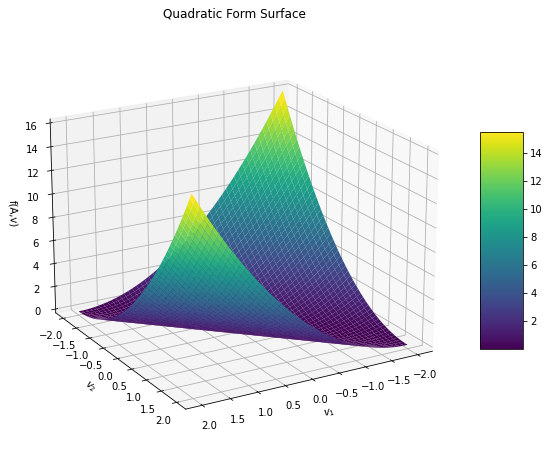

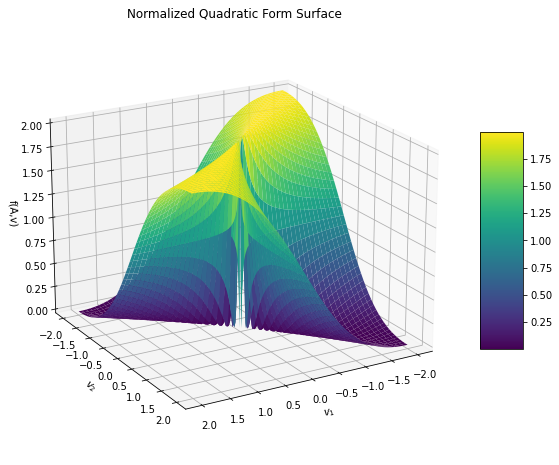

In [5]:
A = np.array([[1,1],[1,1]])

plot_quadratic_form_surface(A, lambda v: quadratic_form(A, v), 
                            start=-2, stop=2, num=200, 
                            title='Quadratic Form Surface')

plot_quadratic_form_surface(A, lambda v: norm_quadratic_form(A, v), 
                            start=-2, stop=2, num=200, 
                            title='Normalized Quadratic Form Surface')

> The goal of this challenge is to explore the definiteness of random-integer matrices. Start by writing code that generates a $4 \times 4$ matrix of random integers between -10 and +10, and that has all real-valued eigenvalues. You could solve this by multiplying the matrix by its transpose (e.g. make matrix symmetric), but that will limit the possibilities of definiteness categories. Thus continue creating random matrices until all 4 eigenvalues are real-valued. Next compute the definiteness category of the matrix.
>
> Once you have the code working, generate 500 matrices. Build a histogram of the definiteness category. What have you discovered about the quadratic forms of random matrices.

Notes
- Most matrices are classified as `indefinite`, followed roughly equal proportions of `positive definite` and `negative definite`.
- As matrix size increases, the proportion of matrices classified as `indefinite` increases.
- As matrix size increases, the number of iterations required to produce a matrix of random integers with real eigenvalues increases.

In [6]:
def randint_matrix_real_eigenvalues(n, minv, maxv):
    """
    randint_matrix_real_eigenvalues returns a matrix of random integers with real eigenvalues

    :param n: int            Size of a single dimension of the returned matrix.
    :param minv: int         Minimum integer value in the returned matrix.
    :param maxv: int         Maximum integer value in the returned matrix.
    :return: numpy.ndarray   Matrix with real eigenvalues.
    """
    maxloop = 1000
    for i in range(maxloop):
        A = np.random.randint(minv, maxv+1, size=(n,n))
        L = np.linalg.eigvals(A)
        if np.sum(np.isreal(L)) == n:
            return A
    raise RuntimeError(f'max iterations: {maxloop}')

In [7]:
definiteness_categories = {
    'positive definite': 0,
    'positive semidefinite': 1,
    'indefinite': 2,
    'negative semidefinite': 3,
    'negative definite': 4,
}


def categorize_definiteness(A):
    """
    categorize_definiteness returns the definiteness category of a matrix

    :param A: numpy.ndarray  Matrix A
    :return: int             Definiteness category
    """
    assert A.shape[0] == A.shape[1], "A is not square"

    # Count properties of the eigenvalues.
    L = np.linalg.eigvals(A)
    tol = L.max() * A.shape[0] * np.finfo(float).eps
    count_positive = np.count_nonzero(L > tol)
    count_zero = np.count_nonzero(np.fabs(L) < tol)
    count_negative = A.shape[0] - count_positive - count_zero
    count_total = count_positive + count_zero + count_negative
    assert count_total == A.shape[0], "counts are not mutually exclusive" 

    # Determine whether matrix is invertible.
    invertible = np.linalg.matrix_rank(A) == A.shape[0]

    # Determine the category.
    if count_positive == A.shape[0] and invertible:
        return definiteness_categories['positive definite']
    if (count_positive + count_zero) == A.shape[0] and not(invertible):
        return definiteness_categories['positive semidefinite']
    if count_positive > 0 and count_negative > 0:
        return definiteness_categories['indefinite']
    if (count_negative + count_zero) == A.shape[0] and not(invertible):
        return definiteness_categories['negative semidefinite']
    if count_negative == A.shape[0] and invertible:
        return definiteness_categories['negative definite']

    raise np.linalg.LinAlgError("unable to categorize matrix")

In [8]:
for n in [2, 3, 4]:
    print(f'{"-":->40}')
    print(f'Matrix Size: {n}x{n}')
    print(f'{"-":->40}')
    minv, maxv, nsamples = -10, 10, 1000
    categories = np.zeros(nsamples)

    # Categorize the definiteness of a sample of matrices with random integer values.
    for i in range(nsamples):
        A = randint_matrix_real_eigenvalues(n, minv, maxv)
        categories[i] = categorize_definiteness(A)

    # Compute a histogram of the count of matrices in each category.
    ncategories = len(definiteness_categories)
    categories_hist, _ = np.histogram(categories, bins=ncategories, range=(0,ncategories-1))

    # Print the count for each bin in the histogram.
    category_to_name = {v:k for k,v in definiteness_categories.items()}
    for i, count in enumerate(categories_hist):
        print(f'{category_to_name[i]:<22}: {count}')

----------------------------------------
Matrix Size: 2x2
----------------------------------------
positive definite     : 123
positive semidefinite : 12
indefinite            : 727
negative semidefinite : 15
negative definite     : 123
----------------------------------------
Matrix Size: 3x3
----------------------------------------
positive definite     : 16
positive semidefinite : 4
indefinite            : 963
negative semidefinite : 2
negative definite     : 15
----------------------------------------
Matrix Size: 4x4
----------------------------------------
positive definite     : 3
positive semidefinite : 0
indefinite            : 996
negative semidefinite : 1
negative definite     : 0
